In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

87.81703247169139 0.2947550882188068
16.010264364186526 -140.10986871220967
49.00486362211598 0.9325371876009854
44.47751719047773 166.34900565216105
-77.7072504888689 -36.153655584712
-38.04231326531319 38.6548530410717
-29.79862181483471 -39.30173006500999
-47.84220599492725 82.71367331485311
83.53237511387599 -176.6520440782176
-88.01123360936484 -38.194449079158005
89.18814849133446 47.37340038985215
-42.66444303076737 -131.12208077418614
-46.399871575410494 -153.27932672513916
83.12095129063707 62.37488149310457
44.74096151354905 -99.75213763530941
-86.59861417669923 -32.89824001910921
83.67334282519894 -74.34531141781837
-74.59784831288513 18.712222074030876
26.94630632151184 -159.1217524228383
-88.10310296451152 -118.98401003225062
30.23767519781147 -20.154330923890512
-51.95743579817114 173.36766599897533
-14.865297227133567 80.18387230108328
-61.79904132089335 103.60682535601467
39.31277577439849 -5.239090393903098
29.138249263403424 92.85577145483308
37.39158745457658 72.9462

87.93210314604198 53.71576629797269
-45.02580732289538 -162.02696404840154
-0.28712770840961355 -87.05276112371313
-79.28638382728045 92.73119547754112
0.7281953624658115 -134.02952713708677
-82.13856939131067 3.900381376759867
-83.59907132413436 -75.0648930057126
14.286290575683125 89.48194419299898
-33.31380404901592 56.91202029305816
10.376895262116676 61.32364936147846
-28.148213791670656 0.17764813067267937
23.9271425677951 118.91464222635409
62.93484531534193 143.06060402565788
-16.1453106396699 -60.105771286652214
-64.66004321803769 -115.43529349340658
79.40050424180734 138.66085528177456
-87.73328170169057 90.55567007482136
-19.34276530903648 -155.91089517338273
70.34027283456521 179.60577103398072
83.42004710271704 -9.476021088816793
-1.9886190680179396 34.488754476647586
-79.71529130606928 41.38508287552335
-50.91116890408761 5.884361143572789


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f352f62c454bb7c6c58eff33e7103f1f


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | evreux
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | pierre
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | kai

Processing Record 36 of Set 4 | flinders
Processing Record 37 of Set 4 | kendari
Processing Record 38 of Set 4 | asfi
Processing Record 39 of Set 4 | strelka
Processing Record 40 of Set 4 | silla
Processing Record 41 of Set 4 | aripuana
Processing Record 42 of Set 4 | puerto del rosario
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | forrest city
Processing Record 45 of Set 4 | clarence town
Processing Record 46 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 47 of Set 4 | suleja
Processing Record 48 of Set 4 | kirakira
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | micheweni
Processing Record 2 of Set 5 | aldan
Processing Record 3 of Set 5 | faya
Processing Record 4 of Set 5 | sola
Processing Record 5 of Set 5 | venado tuerto
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | victoria
Processing Record 

Processing Record 30 of Set 8 | lata
Processing Record 31 of Set 8 | boromo
Processing Record 32 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 33 of Set 8 | djibo
Processing Record 34 of Set 8 | fort nelson
Processing Record 35 of Set 8 | celestun
Processing Record 36 of Set 8 | castro
Processing Record 37 of Set 8 | mastic beach
Processing Record 38 of Set 8 | forssa
Processing Record 39 of Set 8 | leku
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | belaya gora
Processing Record 42 of Set 8 | gamba
Processing Record 43 of Set 8 | haines junction
Processing Record 44 of Set 8 | harper
Processing Record 45 of Set 8 | vanimo
Processing Record 46 of Set 8 | cuamba
Processing Record 47 of Set 8 | yendi
Processing Record 48 of Set 8 | antofagasta
Processing Record 49 of Set 8 | kismayo
Processing Record 50 of Set 8 | cabinda
Processing Record 1 of Set 9 | suntar
Processing Record 2 of Set 9 | kindu
Processing Record 3 of Set 9 | las vegas
Process

Processing Record 16 of Set 12 | kathu
Processing Record 17 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 12 | toliary
City not found. Skipping...
Processing Record 19 of Set 12 | svetlyy
Processing Record 20 of Set 12 | teruel
Processing Record 21 of Set 12 | hirado
Processing Record 22 of Set 12 | koboldo
City not found. Skipping...
Processing Record 23 of Set 12 | misratah
Processing Record 24 of Set 12 | yomou
Processing Record 25 of Set 12 | asau
Processing Record 26 of Set 12 | kabompo
Processing Record 27 of Set 12 | warqla
City not found. Skipping...
Processing Record 28 of Set 12 | pangody
Processing Record 29 of Set 12 | anshun
Processing Record 30 of Set 12 | saint john
Processing Record 31 of Set 12 | williston
Processing Record 32 of Set 12 | kavaratti
Processing Record 33 of Set 12 | pasighat
Processing Record 34 of Set 12 | saint-joseph
Processing Record 35 of Set 12 | makung
City not found. Skipping...
Processing Record 36 of Set 12 | san

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,79.29,93,100,8.05,US,2022-05-06 04:23:07
1,Evreux,49.0241,1.1508,45.52,100,15,3.44,FR,2022-05-06 04:23:07
2,Nikolskoye,59.7035,30.7861,48.09,68,87,6.49,RU,2022-05-06 04:18:02
3,Ushuaia,-54.8000,-68.3000,36.34,96,89,7.74,AR,2022-05-06 04:15:13
4,Margate,51.3813,1.3862,54.70,77,19,1.99,GB,2022-05-06 04:20:36
5,Arraial Do Cabo,-22.9661,-42.0278,73.87,81,0,23.15,BR,2022-05-06 04:18:04
6,Busselton,-33.6500,115.3333,64.98,44,0,12.30,AU,2022-05-06 04:17:54
7,Rikitea,-23.1203,-134.9692,77.99,85,63,16.51,PF,2022-05-06 04:16:19
8,Mataura,-46.1927,168.8643,64.47,75,100,1.48,NZ,2022-05-06 04:23:09
9,Pierre,44.3683,-100.3510,53.06,83,0,10.36,US,2022-05-06 04:20:27


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-05-06 04:23:07,19.7297,-155.0900,79.29,93,100,8.05
1,Evreux,FR,2022-05-06 04:23:07,49.0241,1.1508,45.52,100,15,3.44
2,Nikolskoye,RU,2022-05-06 04:18:02,59.7035,30.7861,48.09,68,87,6.49
3,Ushuaia,AR,2022-05-06 04:15:13,-54.8000,-68.3000,36.34,96,89,7.74
4,Margate,GB,2022-05-06 04:20:36,51.3813,1.3862,54.70,77,19,1.99
5,Arraial Do Cabo,BR,2022-05-06 04:18:04,-22.9661,-42.0278,73.87,81,0,23.15
6,Busselton,AU,2022-05-06 04:17:54,-33.6500,115.3333,64.98,44,0,12.30
7,Rikitea,PF,2022-05-06 04:16:19,-23.1203,-134.9692,77.99,85,63,16.51
8,Mataura,NZ,2022-05-06 04:23:09,-46.1927,168.8643,64.47,75,100,1.48
9,Pierre,US,2022-05-06 04:20:27,44.3683,-100.3510,53.06,83,0,10.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

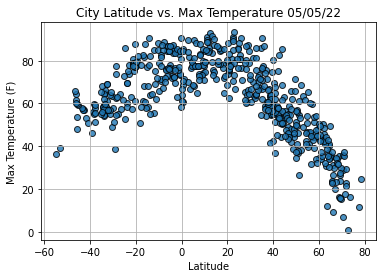

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

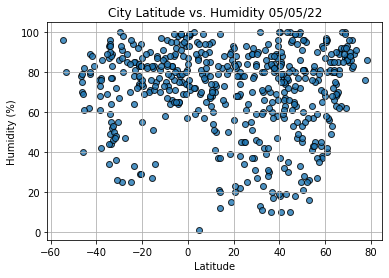

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

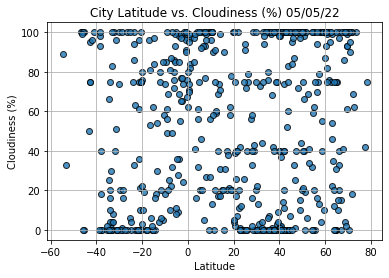

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

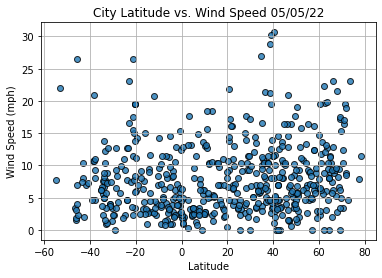

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [89]:
# Import linear regression from SciPy stats module
from scipy.stats import linregress



# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [90]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-05-06 04:16:37
Lat                        -53.15
Lng                      -70.9167
Max Temp                    39.11
Humidity                       80
Cloudiness                     33
Wind Speed                  22.03
Name: 13, dtype: object

In [91]:
city_data_df["Lat"] >=0

0       True
1       True
2       True
3      False
4       True
       ...  
531     True
532     True
533    False
534    False
535    False
Name: Lat, Length: 536, dtype: bool

In [92]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-05-06 04:23:07,19.7297,-155.0900,79.29,93,100,8.05
1,Evreux,FR,2022-05-06 04:23:07,49.0241,1.1508,45.52,100,15,3.44
2,Nikolskoye,RU,2022-05-06 04:18:02,59.7035,30.7861,48.09,68,87,6.49
4,Margate,GB,2022-05-06 04:20:36,51.3813,1.3862,54.70,77,19,1.99
9,Pierre,US,2022-05-06 04:20:27,44.3683,-100.3510,53.06,83,0,10.36


In [93]:
#  using the loc function. Assign each DF to new DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

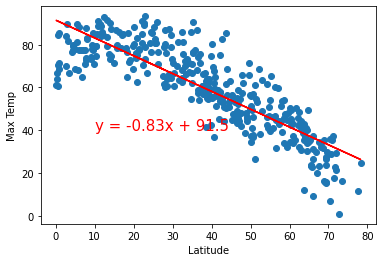

In [94]:
## Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

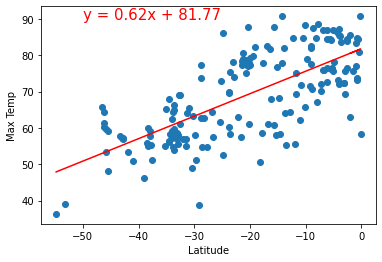

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

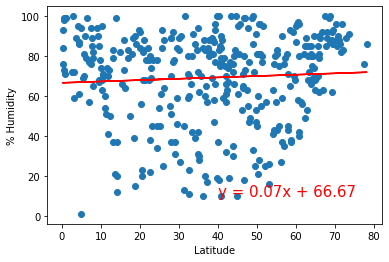

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

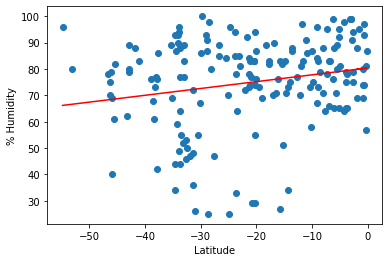

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                        '% Humidity',(-50,15))

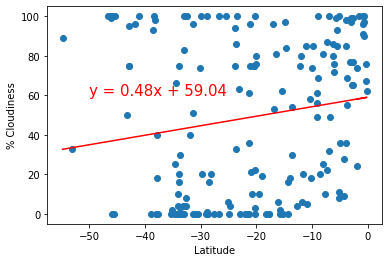

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

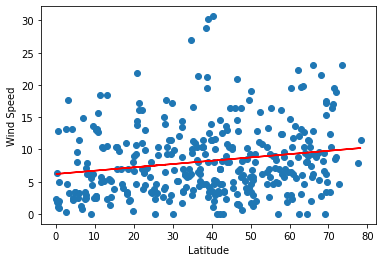

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

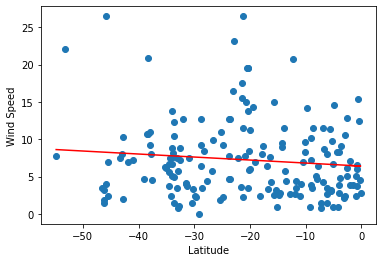

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))